# Modelos de Regresión

Los modelos de regresión lineal son un buen punto de partida para las tareas de regresión. Estos modelos son populares porque pueden ajustarse muy rápidamente y sus resultados son suficientemente interpretables. Probablemente estemos familiarizados con la forma más simple de un modelo de regresión lineal (es decir, ajustar mediante una línea recta), pero dichos modelos pueden extenderse para describir comportamientos más complicados en los datos.

## Regresión lineal simple

La __regresión lineal__ es el método más simple y clásico para la regresión. La regresión lineal encuentra los parámetros $a$ y $b$ que minimizan el error cuadrático medio entre las predicciones del modelo y los valores verdaderos. La regresión lineal no tiene parámetros de ajuste, por lo que el cómputo es muy sencillo pero tampoco se tiene manera de controlar la complejidad del modelo.

Comenzaremos con un ajuste en línea recta a los datos. Un ajuste de línea recta es un modelo de la forma:

$$ y = ax + b $$

donde $ a $ se conoce comúnmente como la pendiente, y $ b $ se conoce como la intersección u ordenada. Considere los siguientes datos de muestra, que se encuentran dispersos en una línea recta con una pendiente de 2 y una intersección de –5

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);
plt.show()

 Podemos usar el estimador de _Scikit-Learn_ `LinearRegression` para ajustar estos datos y construir la recta de ajuste:

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
results=model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);
plt.show()

La pendiente y la intersección están contenidas en los parámetros de ajuste del modelo, que en _Scikit-Learn_ están dados por `coef` and `intercept`:

In [ ]:
print("Model slope: ", model.coef_[0])
print("Model intercept:", model.intercept_)

Nótese que los valores de `slope` e `intercept` son muy similares a los valores de pendiente e intercepción a partir de los cuales fueron creados los datos, es decir $y=2x-5$.

### Regresión lineal múltiple

El estimador `LinearRegression` es mucho más capaz de los que acabamos de mostrar: además de los ajustes simples en línea recta, también puede manejar modelos lineales multidimensionales de la forma:

$$ y = \theta_0 + \theta_1x_1 + \theta_2x_2 + ⋯$$

donde hay múltiples valores de $x$. Geométricamente, esto es similar a ajustar un plano a puntos en tres dimensiones, o ajustar un hiperplano a puntos en mayores dimensiones.

La naturaleza multidimensional de tales regresiones hace que sean más difíciles de visualizar, pero podemos ver uno de estos ajustes en acción al construir algunos datos de ejemplo, utilizando el operador de multiplicación de matrices de `NumPy`:

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

Aquí los datos de $y$ se construyen a partir de tres valores aleatorios de $x$, y la regresión lineal recupera los coeficientes utilizados para construir los datos. De esta manera, podemos usar el estimador de regresión lineal para ajustar líneas, planos o hiperplanos a nuestros datos.

## Regresión con _k-neighbors_

Para introducir el método comencemos usando el vecino más cercano, esta vez usando el conjunto de datos _wave_.

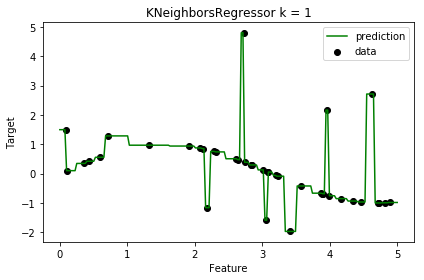

In [1]:
# Generate sample data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 200)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 10 * (0.5 - np.random.rand(8))

# Fit regression model
n_neighbors = 1

knn = neighbors.KNeighborsRegressor(n_neighbors)
y_ = knn.fit(X, y).predict(T)

plt.subplot(1, 1, 1)
plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.legend()
plt.title('KNeighborsRegressor k = %s' %  (n_neighbors))
plt.xlabel("Feature")
plt.ylabel("Target")
plt.tight_layout()
plt.show()

Puede verse que usando solo un vecino, cada punto en el conjunto de entrenamiento tiene una influencia muy fuerte  en las predicciones, y por lo tanto los valores predichos pasan por todos los puntos de datos. Esto conduce a una predicción muy inestable. Considerar más vecinos lleva a predicciones más suaves, pero estas tampoco se ajustan a los datos de entrenamiento.

## Regularización

La discrepancia que observamos anteiormente entre el rendimiento del modelo en el conjunto de entrenamiento y el conjunto de prueba es un signo claro de _sobreajuste_, y por lo tanto, debemos encontrar la manera de controlar la complejidad del nuestro modelo. Una de las alternativas más utilizadas para la regresión lineal son los métodos de __regularización__, que veremos a continuación.

__<font color=blue>Regularización significa explícitamente añadir restricciones a un modelo para evitar el sobreajuste.</font>__

     
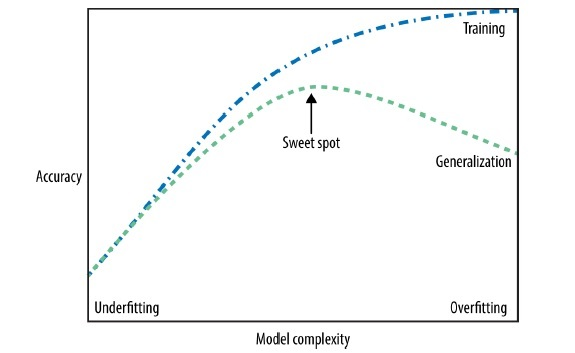

Si nuestro modelo puede hacer buenas predicciones precisas sobre datos que no hemos observado antes, decimos que es capaz de generalizar desde el conjunto de entrenamiento hasta el conjunto de prueba. Sin embargo, cuando construimos modelos muy complejos siempre podremos ser tan precisos como nos guste en el conjunto de entrenamiento, pero seguramente perderemos capacidad de generalización en los datos de prueba (_overfitting_). Por otro lado, si nuestro modelo es demasiado simple, entonces no podrá capturar todos los aspectos y la variabilidad de los datos, lo que se conoce como subajuste (_underfitting_).

### Regresión de Ridge

Quizás la forma más común de regularización se conoce como regresión de __Ridge__ (arista) o regularización $L_2$, a veces también llamada regularización de Tikhonov. Esta trabaja penalizando la suma de cuadrados de los coeficientes del modelo. Por lo tanto, la penalización en el ajuste del modelo sería:

$$P=\alpha \sum^N_{n=1}\theta^2_n$$
 
donde $\alpha$ es un parámetro libre que controla la fuerza de la penalización, o dicho de otra manera, controla la complejidad del modelo resultante. En el límite $\alpha \rightarrow 0$, tendremos el mismo resultado que usando regresión lineal estándar. En el límite $\alpha \rightarrow \infty$ por el contrario, todas las respuestas del modelo serán suprimidas.

Mediante la regresión de Ridge se busca que la magnitud de los coeficientes sea lo más pequeña posible; en otras palabras, todas las entradas deben estar cerca de cero. Intuitivamente, esto significa que cada feature debe tener el menor efecto posible en el resultado (lo que se traduce en tener una pequeña pendiente), mientras se sigue prediciendo bien.

Este tipo de modelo penalizado está integrado en _Scikit-Learn_ con el estimador `Ridge`:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import mglearn

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
ridge = Ridge().fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train)

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()


### Regresión de Lasso

Otro tipo muy común de regularización se conoce como __Lasso__ (least absolute shrinkage and selection operator, por sus siglas en inglés), e implica penalizar la suma de los valores absolutos (norma $L_1$) de los coeficientes de regresión:

$$P=\alpha \sum^N_{n=1}\left| \theta_n \right|$$

Aunque esto es conceptualmente muy similar a la regresión de Ridge, los resultados pueden diferir bastante. Por ejemplo, debido a razones geométricas, la regresión de Lasso tiende a favorecer modelos dispersos cuando es posible. Por lo tanto, establece preferentemente los coeficientes del modelo en exactamente cero.

Esto significa que algunas features son totalmente ignoradas por el modelo, lo que puede verse como una forma de selección automática. Hacer algunos coeficientes exactamente cero a menudo hace que un modelo sea más fácil de interpretar y puede revelar los patrones más significativos del modelo.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import mglearn

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lasso = Lasso().fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

### Ejemplo de regularización

Con conjuntos de datos de dimensiones más altas (con mayor gran cantidad de features) los modelos lineales se vuelven más poderosos, pero también existe una mayor probabilidad de sobreajuste.

Veamos cómo se desempeña el estimador `LinearRegression` en un conjunto de datos más complejo, como el conjunto de datos de Boston Housing. Este conjunto de datos tiene 506 muestras y 104 features.

Primero, cargamos el conjunto de datos y lo dividimos en un conjunto de entrenamiento y un conjunto de testeo. Luego construimos el modelo de regresión lineal:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import mglearn

X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

Los parámetros de pendiente (también llamados pesos o coeficientes), se almacenan en el atributo `coef`, mientras que el desplazamiento o la intersección se almacenan en el atributo `intercept`:

In [ ]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

Veamos cómo ha resultado el rendimiento del estimador en el set de entrenamiento y el set de testeo:

In [ ]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

La regresión de Ridge es implementada en el modelo `linear_model.Ridge`. Veamos qué tan bien trabaja en el conjunto de datos ampliado de Boston Housing:

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Como se puede ver, la puntuación para el conjunto de entrenamiento usando Ridge es más baja que para la regresión lineal, mientras que la puntuación del conjunto de prueba es más alta. Esto es consistente con nuestras expectativas: con la regresión lineal estábamos sobreajustando nuestros datos, mientras que Ridge es un modelo más restringido razón por lo cual es menos probable que sobreajustemos.

__<font color=blue>Podríamos decir que un modelo menos complejo significa un peor rendimiento en el conjunto de entrenamiento, pero una mejor generalización.</font>__

En el ejemplo anterior, usamos el parámetro por defecto $\alpha=1.0$. Sin embargo, no hay ninguna razón por la que esto nos dé la mejor compensación (_trade-off_). La configuración óptima de $\alpha$ depende del conjunto de datos en particular que estamos usando. El aumento de $\alpha$ obliga a que los coeficientes se muevan más hacia cero, lo que disminuye el rendimiento del conjunto de entrenamiento pero puede ayudar a la generalización. Por ejemplo:

In [ ]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

La disminución de $\alpha$ permite que los coeficientes sean menos restringidos, mientras que para valores muy pequeños de $\alpha$ los coeficientes son apenas restringidos y terminamos con un modelo que se parece a la regresión lineal:

In [ ]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Aquí, $\alpha=0.1$ parece estar funcionando bien. Incluso podríamos intentar disminuir el $\alpha$ aún más para intentar mejorar la generalización.

Por su parte, Lasso restringe los coeficientes para que sean cercanos a cero usando regularización $L_1$, y como consecuencia algunos coeficientes serán exactamente cero. Esto significa que algunas features son totalmente ignoradas por el modelo.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Vemos que el modelo Lasso lo hace bastante mal, tanto en el entrenamiento como en el conjunto de test. Esto indica que no estamos ajustando nuestro modelo, y encontramos que solo usó 4 de las 104 features disponibles.

Similar a Ridge, Lasso también tiene un parámetro de regularización $\alpha$, que controla la fuerza con la que los coeficientes son empujados hacia cero. En el ejemplo anterior, usamos el valor predeterminado de `alpha = 1.0`. Para reducir el desajuste, intentemos disminuir el $\alpha$. Cuando hacemos esto, también necesitamos aumentar la configuración predeterminada de `max_iter` (el número máximo de iteraciones para ejecutar):
    

In [ ]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

El rendimiento es ligeramente mejor que con Ridge, y estamos usando solo 33 features. Esto hace que este modelo sea potencialmente más fácil de estudiar. Sin embargo, si establecemos un valor de $\alpha$ demasiado bajo, eliminamos el efecto de regularización y obtenemos un resultado similar a `LinearRegression`:

In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))